In [1]:
# IMAGE RECOGNITION

# Tensorflow and numpy to create the neural network
import tensorflow as tf
import numpy as np

# Matplotlib to plot info to show our results
import matplotlib.pyplot as plt

# OS to load files and save checkpoints
import os

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

import random


In [87]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict


def process_data(data):
    float_data = np.array(data, dtype=float) / 255.0

    reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))

    # The incorrect image

    transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])

    return transposed_data

Categories :
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
shape before reshape : (50000, 32, 32, 3)
This is a(n) automobile:


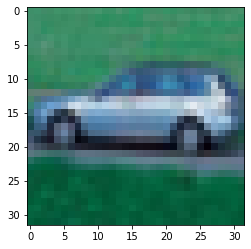

In [88]:
# LOADING THE DATA:

image_height = 32
image_width = 32
color_channels = 3

train_data = np.array([])
train_labels = np.array([])

# Load all the data batches.
for i in range(5):
    data_batch = unpickle( 'data_set/data_batch_' + str(i + 1))
    #for field in data_batch: print(field) 

    train_data = np.append(train_data, data_batch['data'])
    train_labels = np.append(train_labels, data_batch['labels'])

# Load the eval batch.
test_batch = unpickle( 'data_set/test_batch')
test_data = test_batch['data']
test_labels = test_batch['labels']

# Load the english category names.
category_names_bytes = unpickle('data_set/batches.meta')['label_names']
print("Categories :")
print(category_names_bytes)



# Process data
train_data = process_data(train_data)
test_data = process_data(test_data)


print(f'shape before reshape : {np.shape(train_data)}')

# Print a random image with it's label
index_image = random.randint(0,np.shape(test_data)[0])
image = train_data[index_image]
#print(image.dtype)
#print(image.shape)
print(f'This is a(n) {category_names_bytes[int(train_labels[index_image])]}:')
plt.imshow(image)
plt.show()



This is a(n) airplane:


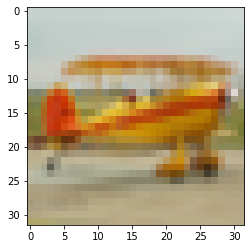

In [89]:
# Print a random image with it's label
index_image = random.randint(0,np.shape(test_data)[0])
image = train_data[index_image]
#print(image.dtype)
#print(image.shape)
print(f'This is a(n) {category_names_bytes[int(train_labels[index_image])]}:')
plt.imshow(image)
plt.show()

In [4]:
# Training and testing our model
#clf = MLPClassifier(random_state=1,learning_rate_init=0.01,learning_rate = 'adaptive',activation='relu' , max_iter=100,verbose=True,hidden_layer_sizes=(50,100,50),solver = 'adam').fit(X_train_scaled[:10000],train_labels[:10000])
#print(test_labels)
#print(clf.predict_proba(X_test_scaled))
#print(clf.predict(X_test_scaled))
#print(clf.score(X_test_scaled, test_labels))

In [93]:
import sys
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness(trainX, trainY,testX,testY):
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    # fit model
    steps = int(trainX.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(testX, testY), verbose=True)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    #learning curves
    summarize_diagnostics(history)
    return model


In [18]:
model_trained = run_test_harness(train_data[:10000],to_categorical(train_labels),test_data, to_categorical(test_labels))

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_9520/1339552798.py:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(testX, testY), verbose=True)


Epoch 1/20
781/781 [==============================] - 224s 285ms/step - loss: 2.1716 - accuracy: 0.2813 - val_loss: 2.0098 - val_accuracy: 0.2942
Epoch 2/20
781/781 [==============================] - 223s 286ms/step - loss: 1.6694 - accuracy: 0.3820 - val_loss: 1.7781 - val_accuracy: 0.3696
Epoch 3/20
781/781 [==============================] - 226s 289ms/step - loss: 1.5423 - accuracy: 0.4332 - val_loss: 1.7705 - val_accuracy: 0.3761
Epoch 4/20
781/781 [==============================] - 223s 286ms/step - loss: 1.4671 - accuracy: 0.4620 - val_loss: 1.6071 - val_accuracy: 0.4238
Epoch 5/20
781/781 [==============================] - 220s 282ms/step - loss: 1.4091 - accuracy: 0.4833 - val_loss: 1.6661 - val_accuracy: 0.4219
Epoch 6/20
781/781 [==============================] - 220s 282ms/step - loss: 1.3554 - accuracy: 0.5073 - val_loss: 1.5840 - val_accuracy: 0.4430
Epoch 7/20
781/781 [==============================] - 221s 283ms/step - loss: 1.3026 - accuracy: 0.5277 - val_loss: 1.6279 -

In [16]:
model_trained.save('model_trained')

NameError: name 'model_trained' is not defined

In [90]:
model = keras.models.load_model('model_trained')

In [94]:
model.evaluate(test_data,to_categorical(test_labels))

313/313 [==============================] - 18s 55ms/step - loss: 1.1207 - accuracy: 0.6122


[1.1206886768341064, 0.6122000217437744]

In [72]:
prediction = model.predict(test_data[5:6])
print(np.shape(test_data[5:6]))
print(np.argmax(prediction, axis = 1))
print(test_labels[5:6])

(1, 32, 32, 3)
[6]
[6]


In [ ]:
# Old detection (Not used) 

def compareCard(subArray, COLOR):
    sum = 0
    for column in range(subArray.shape()[0]):
        for row in range(subArray.shape()[1]):
            if subArray[column,row] == COLOR:
                sum +=1
    result = sum/ ( subArray.shape()[0]*subArray.shape()[1] )
    return result

def detection(image, background_color, backside_color):

    BACKGROUND_COLOR = background_color
    BACKSIDE_COLOR = backside_color

    card_shape = (32,32)
    
    card_list = []

    for column in range(image.shape()[0] - card_shape[0]):
        for row in range(image.shape()[1] - card_shape[1]):
            subArray = image[column:column+card_shape[0], row:row+card_shape[1]]
            if compareCard(subArray,BACKGROUND_COLOR) == 0:
                card_list.append(subArray)
    
    for card in card_list:
        if compareCard(card,BACKSIDE_COLOR) == 0:
            return card

In [79]:
# Old version of main_ai working with CIFAR-10

from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt

class Main_AI():
    def __init__(self,nb_cards:int,model_name:str="model_trained"):
        if(nb_cards%2!=0):
            raise Exception("Invalid number of cards (nb_cards={}), must be an even number".format(nb_cards))
        
        self.nb_cards = nb_cards
        
        self.memory={number:"unknown_card" for number in range(nb_cards)}
        self.model = keras.models.load_model(model_name)
        self.card=None
    
    def getListIndexUnknown(self):
        return [k for k in self.memory if self.memory[k]=="unknown_card"]
    
    def getListIndexRemaining(self):
        return [k for k in self.memory if(self.memory[k].split("_")[1]!="valid")]
    
    def getListIndexLabeled(self):
        return [k for k in self.memory if(self.memory[k].split("_")[1]!="valid" and self.memory[k].split("_")[1]!="card")]
    
    def chooseRandomUnknownCard(self):
        unknown_list = self.getListIndexUnknown()
        self.card=random.choice(unknown_list)
        return self.card
    
    def receiveBoard(self,image_board):
        pass
    
    def check(self,truths,card1,card2):
        return truths[card1]==truths[card2]
                
    def turnCard(self, number:int, board):
        self.turned.append(number)
        plt.imshow(board[number]['image'])
        plt.show()
        return number
        
    def imagesClassification(self,images_list):
        prediction = self.model.predict(images_list)
        return np.argmax(prediction, axis = 1)
    
    def setUnvalidToUnknown(self):
        for i in self.memory:
            if(self.memory[i].split('_')[1]!="valid"):
                self.memory[i] = "unknown_card"
    
    def tempReturnCard(self):
        self.turned = []
        
    def tempCreateRandomBoard(self):
        image_height = 32
        image_width = 32
        color_channels = 3

        def process_data(data):
            float_data = np.array(data, dtype=float) / 255.0

            reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))

            # The incorrect image

            transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])

            return transposed_data


        def unpickle(file):
            import pickle
            with open(file, 'rb') as fo:
                dict = pickle.load(fo, encoding='latin1')
            return dict
    
        board = []

        test_batch = unpickle( 'data_set/test_batch')
        
        images = process_data(test_batch['data'])
        labels = test_batch['labels']

        category_names_bytes = unpickle('data_set/batches.meta')['label_names']

        l_already_used = []
        for i in range(int(self.nb_cards/2)):
            # Find an not existing label 
            label_image = random.randint(0,np.size(category_names_bytes))
            while(label_image in l_already_used):
                label_image = random.randint(0,np.size(category_names_bytes))

            l_already_used.append(label_image)
            
            #print("labels shape : {}".format(np.shape(labels)))

            # Find 2 instances of this class
            found = 0
            while(found!=2):
                index_image = random.randint(0,np.shape(labels)[0]-1)
                #print(index_image)
                if(label_image==labels[index_image]):
                    board.append({"image":images[index_image],"label":label_image})
                    found += 1
                    
        np.random.shuffle(board)
        print("Simulated board :\n")
        print("index : class")
        truths = []
        for i,card in enumerate(board): 
            print("{} : {}".format(i,category_names_bytes[card['label']]))
            truths.append(card['label']) 
        
        return board,category_names_bytes,truths
        
    def tempGetImages(self,board):
        return [board[card]['image'] for card in self.turned]
            
        
    def run(self):
        finished = (np.size(self.getListIndexRemaining()) == 0)
        step = 0
        
        board,category_names_bytes,truths = self.tempCreateRandomBoard()
        print(truths)
        while(not finished):
            print(f'---------------- Step {step} ----------------')
            numbers = []
            self.tempReturnCard()
            
            # Loop into known card unvalided : If 2 cards have same label : return both
            match_found = False
            l_i_labeled = self.getListIndexLabeled()
            if(np.size(l_i_labeled)>2):
                for i,i_card in enumerate(l_i_labeled):
                    for following_i_card in l_i_labeled[i+1:]:
                        if(self.memory[i_card]==self.memory[following_i_card]):
                            match_found = True
                            print("think there is a pair between {} and {}".format(i_card,following_i_card))
                            self.turnCard(i_card,board)
                            self.turnCard(following_i_card,board)

                            # Check memory validation:
                            if(self.check(truths,i_card,following_i_card)):
                                self.memory[i_card] = "{}valid".format(self.memory[i_card])
                                self.memory[following_i_card] = "{}valid".format(self.memory[following_i_card])
                                print("TRUE - it was really a pair")
                            else:
                                self.memory[i_card] = "unknown_card"
                                self.memory[following_i_card] = "unknown_card"
                                print("FALSE - wasn't a pair")

                    
                
            
            if(not(match_found)): # Not find 2 cards with same labels
                if(np.size(self.getListIndexUnknown()) != 0): # If remaining unknown card 
                    numbers.append(self.turnCard(self.chooseRandomUnknownCard(),board))
                    print(numbers)
                    #board = self.receiveBoard()
                    #images_list = detection(board,background_color, backside_color)
                    images_list = self.tempGetImages(board)

                    predictions = self.imagesClassification(np.array(images_list))

                    print("ai think that card number {} is {}".format(numbers[0],category_names_bytes[predictions[0]]))

                    found = False
                    for i in self.memory:
                        if(self.memory[i].split("_")[0]==category_names_bytes[predictions[0]]):
                            numbers.append(self.turnCard(i,board))
                            print(numbers)
                            found = True
                            print("think there is a pair with {}".format(numbers[1]))

                            # Check memory validation
                            if(self.check(truths,numbers[0],i)):
                                self.memory[numbers[0]] = "{}_valid".format(category_names_bytes[predictions[0]])
                                self.memory[i] = "{}_valid".format(category_names_bytes[predictions[0]])
                                print("TRUE - it was really a pair")
                            else:
                                self.memory[numbers[0]] = "unknown_card"
                                self.memory[i] = "unknown_card"
                                print("FALSE - wasn't a pair")

                    if(not(found)):
                        first_image_pred = predictions[0]
                        self.memory[numbers[0]] = "{}_".format(category_names_bytes[predictions[0]])
                        
                        if(np.size(self.getListIndexUnknown()) != 0): # If remaining unknown card 
                            numbers.append(self.turnCard(self.chooseRandomUnknownCard(),board))
                        else:
                            self.setUnvalidToUnknown()
                            self.memory[numbers[0]] = "{}_".format(category_names_bytes[predictions[0]])
                            numbers.append(self.turnCard(self.chooseRandomUnknownCard(),board))

                        sameCard = self.check(truths,numbers[0],numbers[1])
                        print(numbers)
                        images_list = self.tempGetImages(board)
                        predictions = self.imagesClassification(np.array(images_list))

                        if(predictions[0]==predictions[1]):
                            print("Think find randomly a pair with {}".format(numbers[1]))
                            # Check memory validation
                            if(sameCard):
                                self.memory[numbers[0]] = "{}_valid".format(category_names_bytes[predictions[0]])
                                self.memory[numbers[1]] = "{}_valid".format(category_names_bytes[predictions[0]])
                                print("TRUE - it was really a pair")
                            else:
                                self.memory[numbers[0]] = "unknown_card"
                                self.memory[numbers[1]] = "unknown_card"
                                print("FALSE - wasn't a pair")
                        else:
                            if(predictions[0]==first_image_pred):
                                print("ai think that card number {} is {}".format(numbers[1],category_names_bytes[predictions[1]]))
                                self.memory[numbers[0]] = "{}_".format(category_names_bytes[predictions[0]])
                                self.memory[numbers[1]] = "{}_".format(category_names_bytes[predictions[1]])
                            else:
                                print("ai think that card number {} is {}".format(numbers[1],category_names_bytes[predictions[0]]))
                                self.memory[numbers[0]] = "{}_".format(category_names_bytes[predictions[1]])
                                self.memory[numbers[1]] = "{}_".format(category_names_bytes[predictions[0]])
                                
                            if(sameCard):
                                print("It was in fact same card")
                                self.memory[numbers[0]] = "?{}_valid".format(step)
                                self.memory[i] = "?step{}_valid".format(step)
                
                else: # No unkown card remaining : all known card to unknown (TOIMPROVE)
                    self.setUnvalidToUnknown()
                    
            step += 1
            finished = (np.size(self.getListIndexRemaining()) == 0)
            print(self.memory)
            

Simulated board :

index : class
0 : truck
1 : airplane
2 : dog
3 : bird
4 : bird
5 : truck
6 : airplane
7 : automobile
8 : automobile
9 : dog
[9, 0, 5, 2, 2, 9, 0, 1, 1, 5]
---------------- Step 0 ----------------


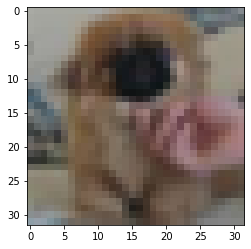

[2]
ai think that card number 2 is frog


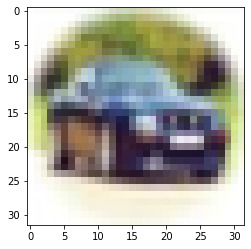

[2, 8]
ai think that card number 8 is automobile
{0: 'unknown_card', 1: 'unknown_card', 2: 'frog_', 3: 'unknown_card', 4: 'unknown_card', 5: 'unknown_card', 6: 'unknown_card', 7: 'unknown_card', 8: 'automobile_', 9: 'unknown_card'}
---------------- Step 1 ----------------


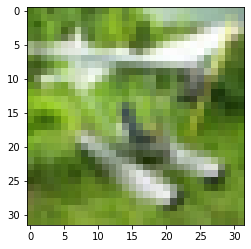

[6]
ai think that card number 6 is frog


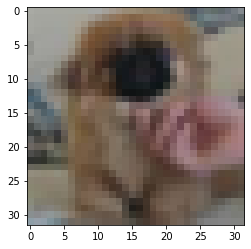

[6, 2]
think there is a pair with 2
FALSE - wasn't a pair
{0: 'unknown_card', 1: 'unknown_card', 2: 'unknown_card', 3: 'unknown_card', 4: 'unknown_card', 5: 'unknown_card', 6: 'unknown_card', 7: 'unknown_card', 8: 'automobile_', 9: 'unknown_card'}
---------------- Step 2 ----------------


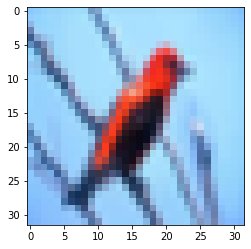

[3]
ai think that card number 3 is deer


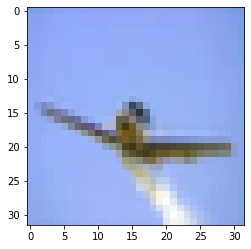

[3, 1]
ai think that card number 1 is airplane
{0: 'unknown_card', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'unknown_card', 5: 'unknown_card', 6: 'unknown_card', 7: 'unknown_card', 8: 'automobile_', 9: 'unknown_card'}
---------------- Step 3 ----------------


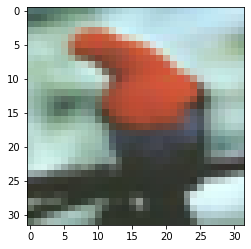

[4]
ai think that card number 4 is truck


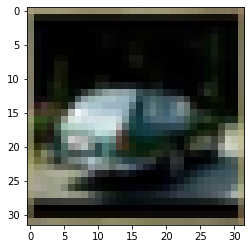

[4, 7]
ai think that card number 7 is automobile
{0: 'unknown_card', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'unknown_card', 6: 'unknown_card', 7: 'automobile_', 8: 'automobile_', 9: 'unknown_card'}
---------------- Step 4 ----------------
think there is a pair between 7 and 8


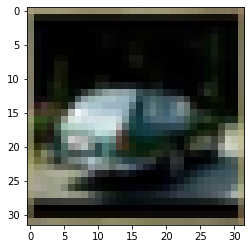

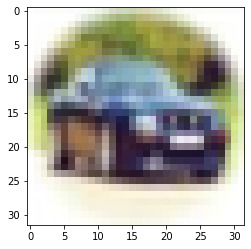

TRUE - it was really a pair
{0: 'unknown_card', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'unknown_card', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'unknown_card'}
---------------- Step 5 ----------------


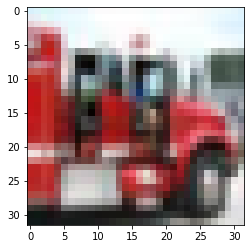

[5]
ai think that card number 5 is truck


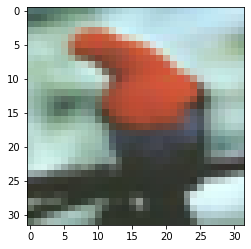

[5, 4]
think there is a pair with 4
FALSE - wasn't a pair
{0: 'unknown_card', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'unknown_card', 5: 'unknown_card', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'unknown_card'}
---------------- Step 6 ----------------


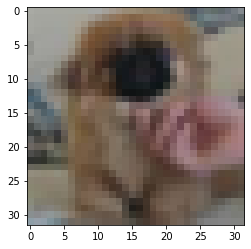

[2]
ai think that card number 2 is frog


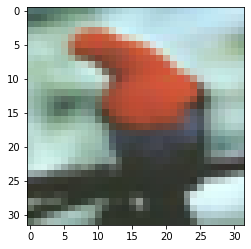

[2, 4]
ai think that card number 4 is truck
{0: 'unknown_card', 1: 'airplane_', 2: 'frog_', 3: 'deer_', 4: 'truck_', 5: 'unknown_card', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'unknown_card'}
---------------- Step 7 ----------------


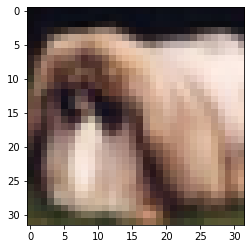

[9]
ai think that card number 9 is dog


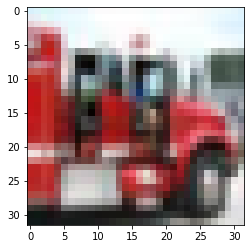

[9, 5]
ai think that card number 5 is truck
{0: 'unknown_card', 1: 'airplane_', 2: 'frog_', 3: 'deer_', 4: 'truck_', 5: 'truck_', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 8 ----------------
think there is a pair between 4 and 5


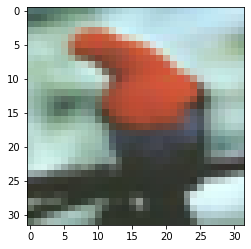

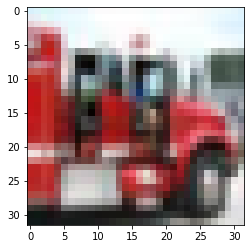

FALSE - wasn't a pair
{0: 'unknown_card', 1: 'airplane_', 2: 'frog_', 3: 'deer_', 4: 'unknown_card', 5: 'unknown_card', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 9 ----------------


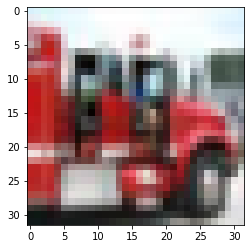

[5]
ai think that card number 5 is truck


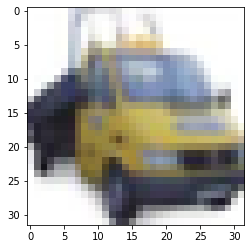

[5, 0]
Think find randomly a pair with 0
TRUE - it was really a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'frog_', 3: 'deer_', 4: 'unknown_card', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 10 ----------------


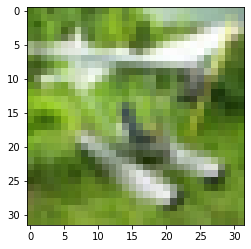

[6]
ai think that card number 6 is frog


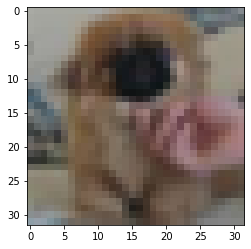

[6, 2]
think there is a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'unknown_card', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 11 ----------------


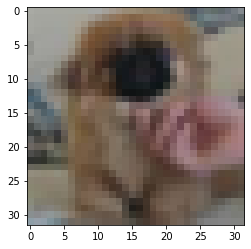

[2]
ai think that card number 2 is frog


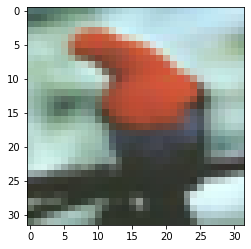

[2, 4]
ai think that card number 4 is truck
{0: 'truck_valid', 1: 'airplane_', 2: 'frog_', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 12 ----------------


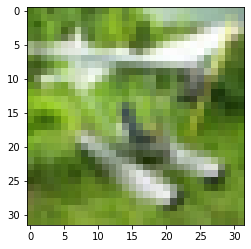

[6]
ai think that card number 6 is frog


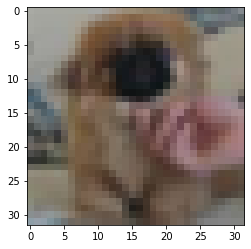

[6, 2]
think there is a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 13 ----------------


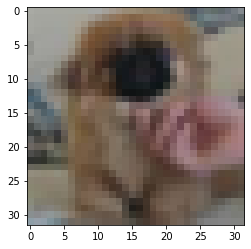

[2]
ai think that card number 2 is frog


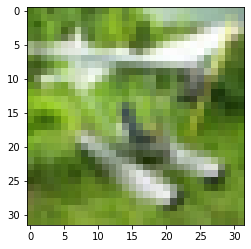

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 14 ----------------


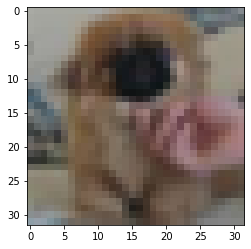

[2]
ai think that card number 2 is frog


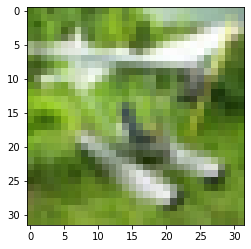

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 15 ----------------


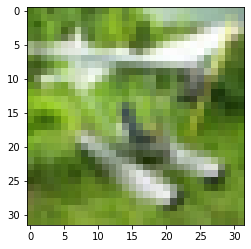

[6]
ai think that card number 6 is frog


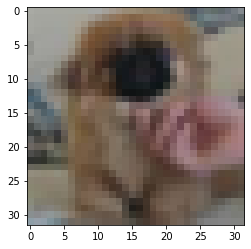

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 16 ----------------


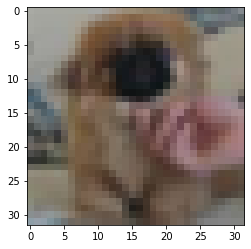

[2]
ai think that card number 2 is frog


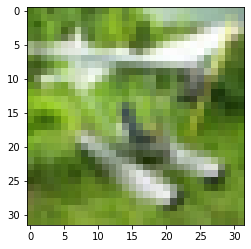

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 17 ----------------


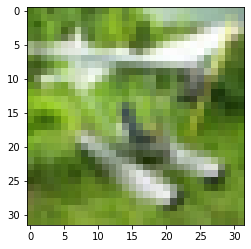

[6]
ai think that card number 6 is frog


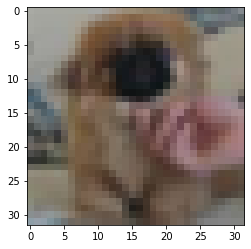

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 18 ----------------


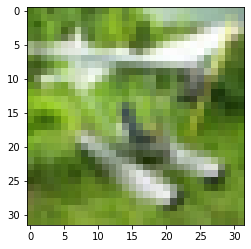

[6]
ai think that card number 6 is frog


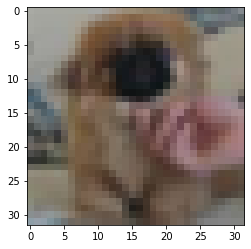

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 19 ----------------


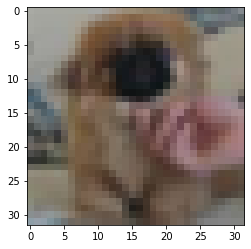

[2]
ai think that card number 2 is frog


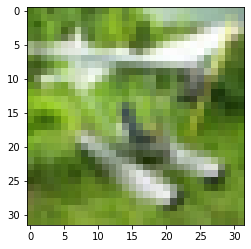

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 20 ----------------


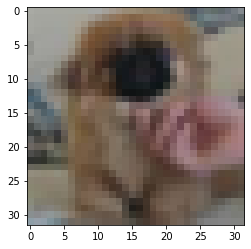

[2]
ai think that card number 2 is frog


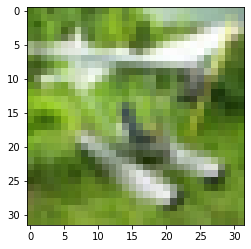

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 21 ----------------


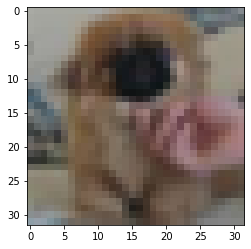

[2]
ai think that card number 2 is frog


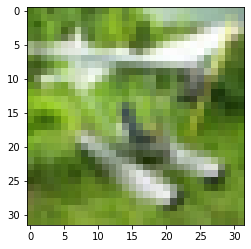

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 22 ----------------


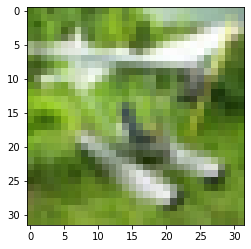

[6]
ai think that card number 6 is frog


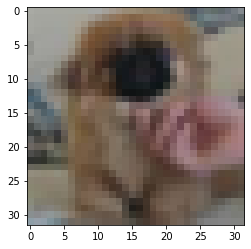

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 23 ----------------


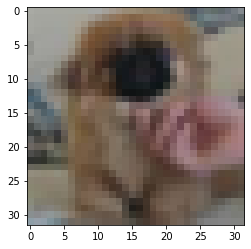

[2]
ai think that card number 2 is frog


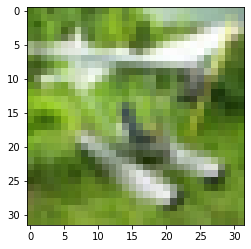

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 24 ----------------


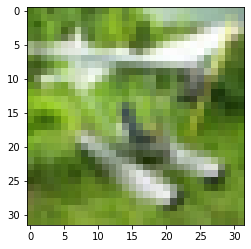

[6]
ai think that card number 6 is frog


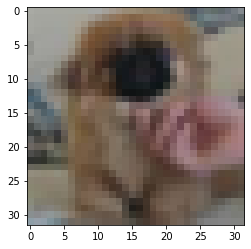

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 25 ----------------


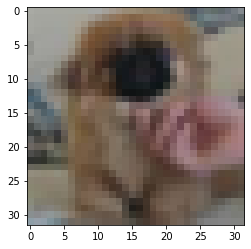

[2]
ai think that card number 2 is frog


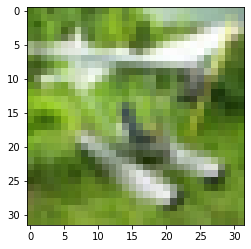

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 26 ----------------


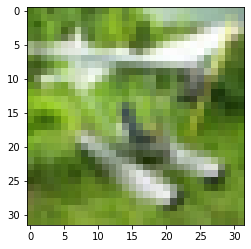

[6]
ai think that card number 6 is frog


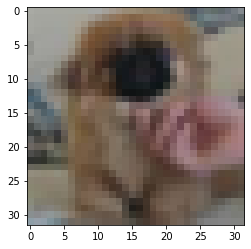

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 27 ----------------


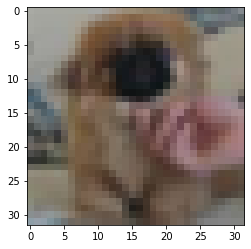

[2]
ai think that card number 2 is frog


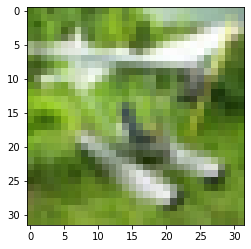

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 28 ----------------


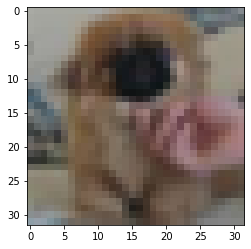

[2]
ai think that card number 2 is frog


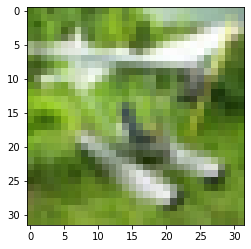

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 29 ----------------


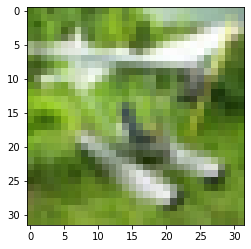

[6]
ai think that card number 6 is frog


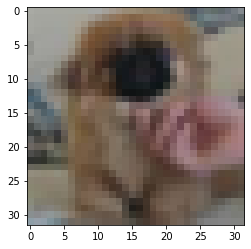

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 30 ----------------


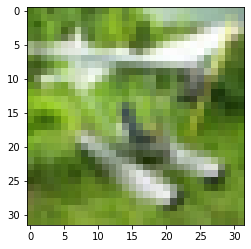

[6]
ai think that card number 6 is frog


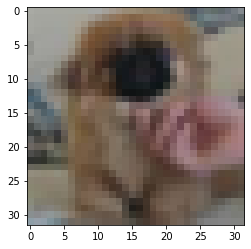

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 31 ----------------


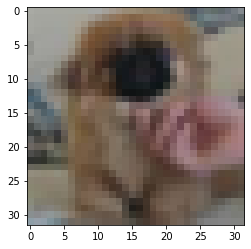

[2]
ai think that card number 2 is frog


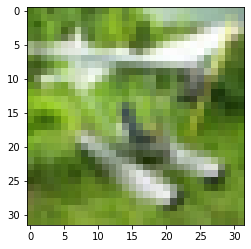

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 32 ----------------


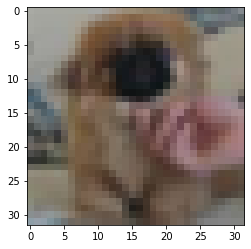

[2]
ai think that card number 2 is frog


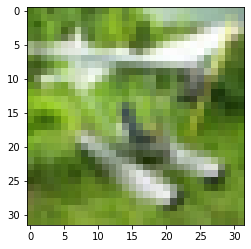

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 33 ----------------


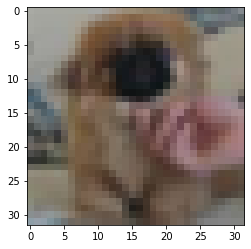

[2]
ai think that card number 2 is frog


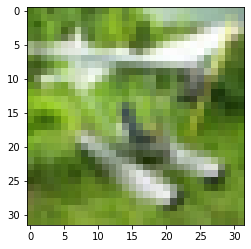

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 34 ----------------


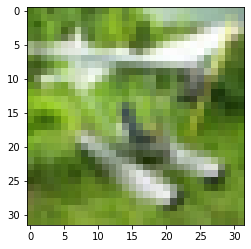

[6]
ai think that card number 6 is frog


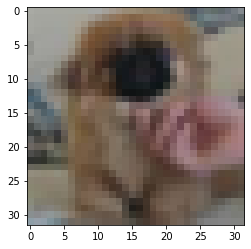

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 35 ----------------


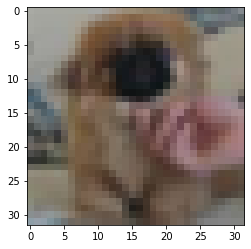

[2]
ai think that card number 2 is frog


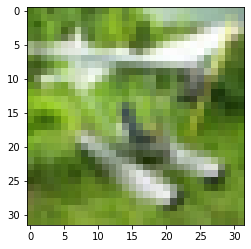

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 36 ----------------


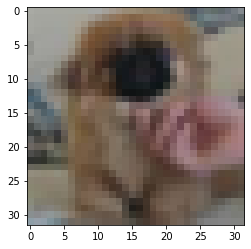

[2]
ai think that card number 2 is frog


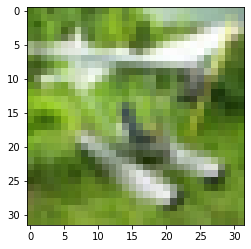

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 37 ----------------


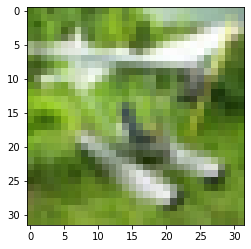

[6]
ai think that card number 6 is frog


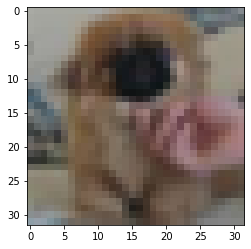

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 38 ----------------


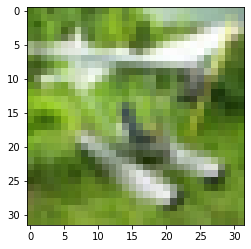

[6]
ai think that card number 6 is frog


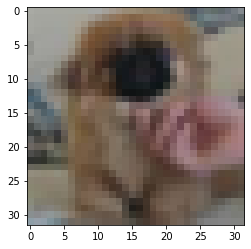

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 39 ----------------


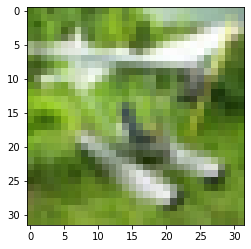

[6]
ai think that card number 6 is frog


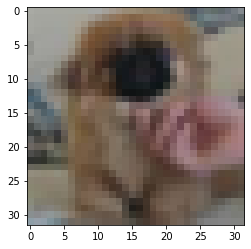

[6, 2]
Think find randomly a pair with 2
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 40 ----------------


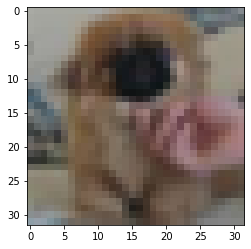

[2]
ai think that card number 2 is frog


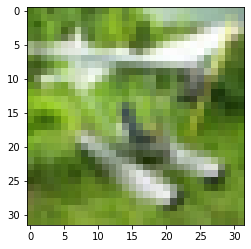

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 41 ----------------


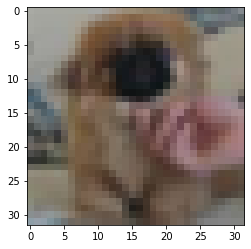

[2]
ai think that card number 2 is frog


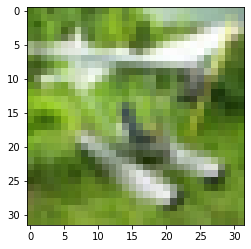

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 42 ----------------


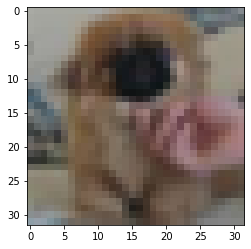

[2]
ai think that card number 2 is frog


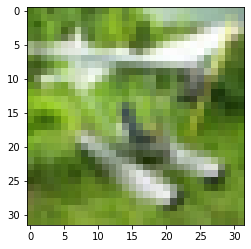

[2, 6]
Think find randomly a pair with 6
FALSE - wasn't a pair
{0: 'truck_valid', 1: 'airplane_', 2: 'unknown_card', 3: 'deer_', 4: 'truck_', 5: 'truck_valid', 6: 'unknown_card', 7: 'automobile_valid', 8: 'automobile_valid', 9: 'dog_'}
---------------- Step 43 ----------------


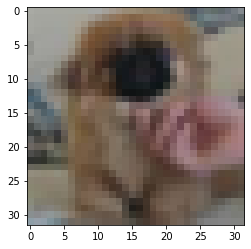

[2]
ai think that card number 2 is frog


KeyboardInterrupt: 

In [85]:
# Old version of main_ai (working with CIFAR-10)

import warnings
warnings.filterwarnings('ignore')
def main():
    ai  = Main_AI(10)
    ai.run()
    
main()

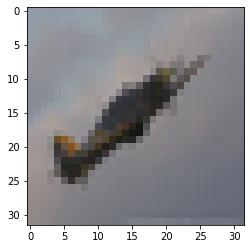

This is a airplane
[6 1 6 6 1]
[6, 1, 6, 3, 1]


In [97]:
# Code to load cifar-10 and test trained model of classification (CNN handmade)

# Python version 3.9.0
# Import
from tensorflow import keras # tensorflow version 2.7.0
import random
import numpy as np
import matplotlib.pyplot as plt

# Images and labels extraction
image_height = 32
image_width = 32
color_channels = 3

def process_data(data):
    float_data = np.array(data, dtype=float) / 255.0
    reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))
    # The incorrect image
    transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])
    return transposed_data

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

test_batch = unpickle( 'data_set/test_batch')
images = process_data(test_batch['data'])
labels = test_batch['labels']
category_names_bytes = unpickle('data_set/batches.meta')['label_names']

index = random.randint(0,np.shape(labels)[0]-1)
image = images[index]
plt.imshow(image)
plt.show()
print("This is a {}".format(category_names_bytes[labels[index]]))

# Prediction
print("Prediction")
model = keras.models.load_model('model_trained')
prediction = model.predict(images[5:10])
print(np.argmax(prediction, axis = 1))
print(labels[5:10])
